# End-to-End Project #1

# US General Election Poll Data Analysis

In this project, we'll look at the opinion poll data from the upcoming 2016 General Election. In the process, we'll try to answer the following questions:

- Who was being polled and what was their party affiliation?
- Did the poll results favour Clinton or Trump?
- How did voter sentiment change over time?
- Can we see an effect in the polls from the debates?

So let's get started !

In [45]:
#Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# from __future__ import division

#Imports to grab and parse data from the web
import requests

from io import StringIO

We'll grab the poll data from _HuffPost Pollster_, and we'll use StringIO to prevent errors with pandas.

# Data source Collection

**Data scraping using requests library to get data into text form**

*Data scraping, also known as web scraping, is the process of importing information from a website into a spreadsheet or local file saved on your computer.*


In [46]:
#url for the poll data
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

#Using requests to get the data in text form
source = requests.get(url).text

#Using String IO to prevent IO errors with pandas
poll_data = StringIO(source)

- # Reading the data

Read the poll data file provided and store it in a dataframe `df`.

In [47]:
#Reading the csv object into a pandas dataframe
df = pd.read_csv(poll_data)

- # Inspecting the dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [48]:
# Check the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

In [49]:
# Check the number of rows and columns in the dataframe

df.shape

(1522, 17)

In [50]:
# Check if there is any missing values in the dataframe

df.isnull().sum()

Pollster                    0
Start Date                  0
End Date                    0
Entry Date/Time (ET)        0
Number of Observations    509
Population                  0
Mode                        0
Trump                       0
Clinton                     0
Other                     424
Undecided                  62
Pollster URL                0
Source URL                  0
Partisan                    0
Affiliation                 0
Question Text             861
Question Iteration          0
dtype: int64

In [51]:
# The top five rows of our dataframe

df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [52]:
df.describe()

,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration
count,1013.000000,1522.00000,1522.000000,1098.000000,1460.000000,1522.000000
mean,1916.022705,40.64389,42.733903,5.806011,9.315068,1.216820
std,5050.240246,23.56639,25.298731,5.009533,6.253118,0.412214
min,59.000000,2.00000,1.000000,0.000000,0.000000,1.000000
25%,543.000000,32.00000,27.000000,3.000000,5.000000,1.000000
50%,894.000000,39.00000,42.000000,4.000000,8.000000,1.000000
75%,1281.000000,45.00000,50.000000,8.000000,12.000000,1.000000
max,70194.000000,93.00000,96.000000,34.000000,36.000000,2.000000


- ### Who was being polled and what was their party affiliation?

Quickly visualising the affiliations of the different pollsters.

/home/santosh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


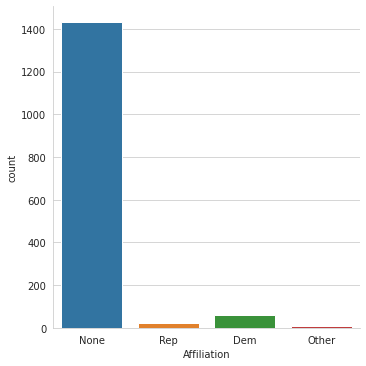

In [53]:
# Using seaborn factorplot, it returns the FacetGrid object with the plot on it for further tweaking.

sns.catplot('Affiliation',data=df,kind='count')

Most of the polls have no affiliation; though there's stronger affiliation for Democrats than for Republicans.

/home/santosh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


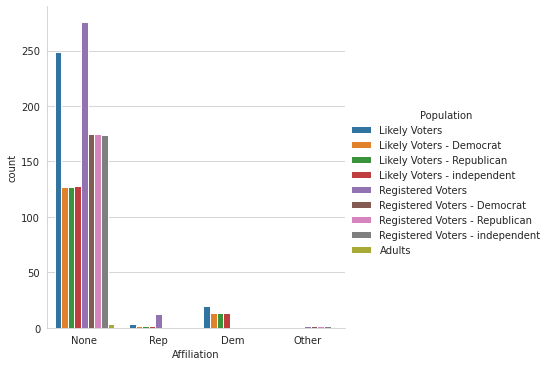

In [54]:
sns.catplot('Affiliation',data=df,hue='Population',kind='count')

As there's a strong sample of registered voters that are not affiliated, we can hope that the poll data is a good representation of the upcoming elections.

/home/santosh/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


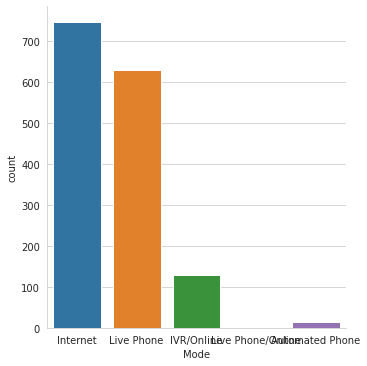

In [55]:
sns.catplot('Mode',data=df,kind='count')

In [56]:
df.Mode.value_counts()

Internet             748
Live Phone           631
IVR/Online           128
Automated Phone       14
Live Phone/Online      1
Name: Mode, dtype: int64

- ### Did the poll results favour Clinton or Trump?

In [57]:
# Getting mean value of each numerical columns

avg = pd.DataFrame(df.mean())

# Dropping the mean values for No of observation and Question Iteration

avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

avg

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [58]:
#The standard deviation for each contestant

std = pd.DataFrame(df.std())

std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


<AxesSubplot:>

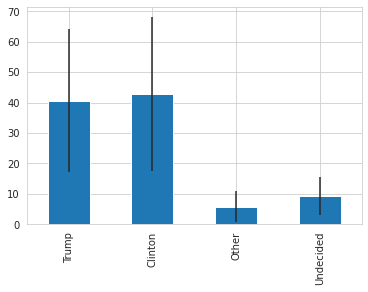

In [59]:
# Ploting the std for each contestant

avg.plot(yerr=std,kind='bar',legend=False)

The race seems to be really close, with results in favour of Clinton with a higher standard deviation than for Trump.

In [60]:
# creating a new dataframe df_avg of columns average and standard deviation

df_avg = pd.concat([avg,std],axis=1)

df_avg.columns = ['Average','Stdev']

df_avg

,Average,Stdev
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [61]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


- ### How did voter sentiment change over time?

In [62]:
# importing the datetime library for time series analysis

from datetime import datetime

# Creating a new column for differemce in the voting for Clinton and Trump

df['Difference'] = (df.Clinton - df.Trump)/100

df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


The difference is Clinton - Trump. So a positive difference indicates a Clinton lead, and a negative difference indicates a Trump lead.

In [63]:
#Grouping polls by the start data
df = df.groupby(['Start Date'],as_index=False).mean()

df.tail()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
262,2016-10-31,30546.600000,45.200000,48.600000,3.333333,3.333333,1.400000,0.034000
263,2016-11-01,734.125000,45.500000,43.571429,4.642857,2.384615,1.285714,-0.019286
264,2016-11-02,1748.400000,40.823529,42.411765,6.941176,6.823529,1.470588,0.015882
265,2016-11-03,1386.250000,43.285714,46.428571,4.428571,2.000000,1.000000,0.031429
266,2016-11-04,1144.461538,43.052632,43.789474,4.052632,4.578947,1.052632,0.007368


<AxesSubplot:xlabel='Start Date'>

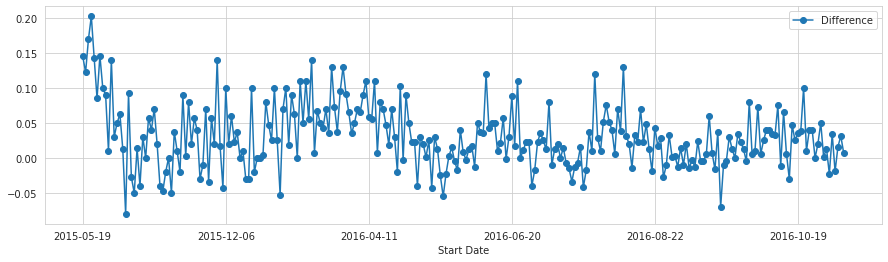

In [64]:
df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-')

The visualisation indicates that Trump has a slight lead in the polls, on average. __Keep in mind that this is without accounting for the weights of different polls, demographics, and affiliations of the population polled.__ 

The latest start date in our grouped dataframe is 27-September-2016.

- ### Can we see an effect in the polls from the debates?

Another interesting thing that we can look into, is what happened on the days leading up to the first debate, and afterwards. We know that the debate was on 26-September-2016, so we'll plot the trends for the month of September.

To get a list of indices for September, we'll loop through the dataframe, and append any row with a September start date to the list.

In [66]:
row_in = 0
xlimit = []

for date in df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print("First September Index: " + str(min(xlimit)))
print("Last (Available) September Index: "+ str(max(xlimit)))

First September Index: 209
Last (Available) September Index: 231


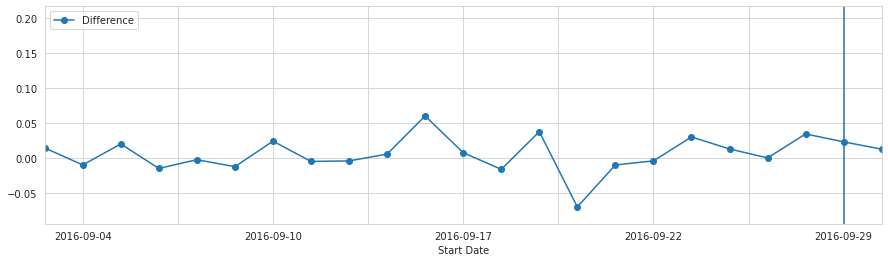

In [71]:
df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-',xlim=(209,231))

#Vertical line for debate date
plt.axvline(x=230)

And what it looks like, is that the sentiment shifted slightly in favour of Trump, after the debate. Again, it's important to keep in mind that we're dealing with averages.

**End of the project**